In [149]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import numpy as np
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats
import scripts.get_namelist as nml

def visualize_one(reader, step, qname, plane, cmap, dtheta=0,domega=0,savename=''):
    reader.step = step
    fs = 12
    q = reader.readData(qname)
    q = np.squeeze(np.array(q))
    
    fig = plt.figure(figsize=(10,10), dpi=500) 
    axarr = plt.axes()

    # Plot the colors
    if plane=='xy': data2plot = np.transpose(q)
    if plane=='xz': data2plot = np.transpose(q)
    im = axarr.imshow( data2plot, cmap=cmap, origin='lower', interpolation='spline36')
    axarr.set_title(qname, fontsize=fs, loc='center')
    axarr.set_xticks([])
    axarr.set_yticks([]) 

    # set the colorbar
    divider1 = make_axes_locatable(axarr)
    cax = divider1.append_axes('right', size='5%', pad=0.1)
    maxval = np.amax(q);
    minval = np.amin(q);
    cbar = plt.colorbar(im, cax,ticks=[minval, maxval])
    cbar.ax.set_yticklabels(['%0.2f'%(minval), '%0.2f'%(maxval)]) 
    cbar.ax.tick_params(labelsize=0.75*fs)    
    
    # overlay the centerline, momentum and vorticity thickness
    if plane=='xy':
        xplot = np.linspace(0,Nx-1,10)
        ones = np.ones(np.shape(xplot))
        centerline = Ny/2*ones
        axarr.plot(xplot,centerline,'k-',alpha=0.5,linewidth=1)
        axarr.plot(xplot,centerline+dy*domega,'k-.',alpha=0.5,linewidth=1)
        axarr.plot(xplot,centerline-dy*domega,'k-.',alpha=0.5,linewidth=1)
        #axarr.plot(xplot,centerline+dy*dtheta,'k--',alpha=0.5,linewidth=1)
        #axarr.plot(xplot,centerline-dy*dtheta,'k--',alpha=0.5,linewidth=1)
        plt.show()
    
    # set the overall title and save
    fig.suptitle('Time: {}'.format(reader.time),size=fs,y=1)
    if savename:
        plt.savefig(savename, dpi=500)#, bbox_inches='tight',pan_inches=0.5)
        plt.close(fig)
        print "Saved plot to ",savename

def which_tID(tvec,t):
    tID = np.argmin(np.abs(tvec-t))
    return tID

def growth_rates(filename_prefix):
    fname = filename_prefix+'growth.dat'
    dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
    n = np.size(dat)

    nstats=3
    dat = np.reshape(dat,[n/nstats,nstats])
    time = dat[:,0]
    dtheta = dat[:,1]
    domega = dat[:,2]
    return time,dtheta,domega    

In [153]:
#directory = "/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr_7/512x512x180/"
#directory = "/projects/ShockInducedMix/ShearLayerData/production/Mc24/rr1/512x362x180/"
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x384x128'
filename_prefix = directory+'/shearlayer_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(False,False,True))
Nx,Ny,Nz,Lx,Ly,Lz,dx,dy,dz,kx,kz = stats.domain(reader,verbose=1)
steps = sorted(reader.steps)
inp = nml.inputs(directory,verbose=True)

print("Steps: {}".format(steps))

Domain size: 172.0 x 257.328125 x 82.0
Grid size: 256 x 384 x 128
Grid res: 0.671875 x 0.671875 x 0.640625
Note: Missing D# multiplier for line:
	Re      = 640         ! Reynolds number rho_Ref*dU*L/mu_ref
	Assuming multiplier is 1.

Params for this run:
	Mc = 1.2
	Re = 640.0
	rr = 1.0
Steps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [156]:
step = 9
time,dtheta,domega = growth_rates(filename_prefix)
print("Re = {}".format(inp.du*dtheta[step-1]/inp.mu_ref))
print("dtheta = {}".format(dtheta[step-1]))

Re = 11898.126064
dtheta = 6.54671345462


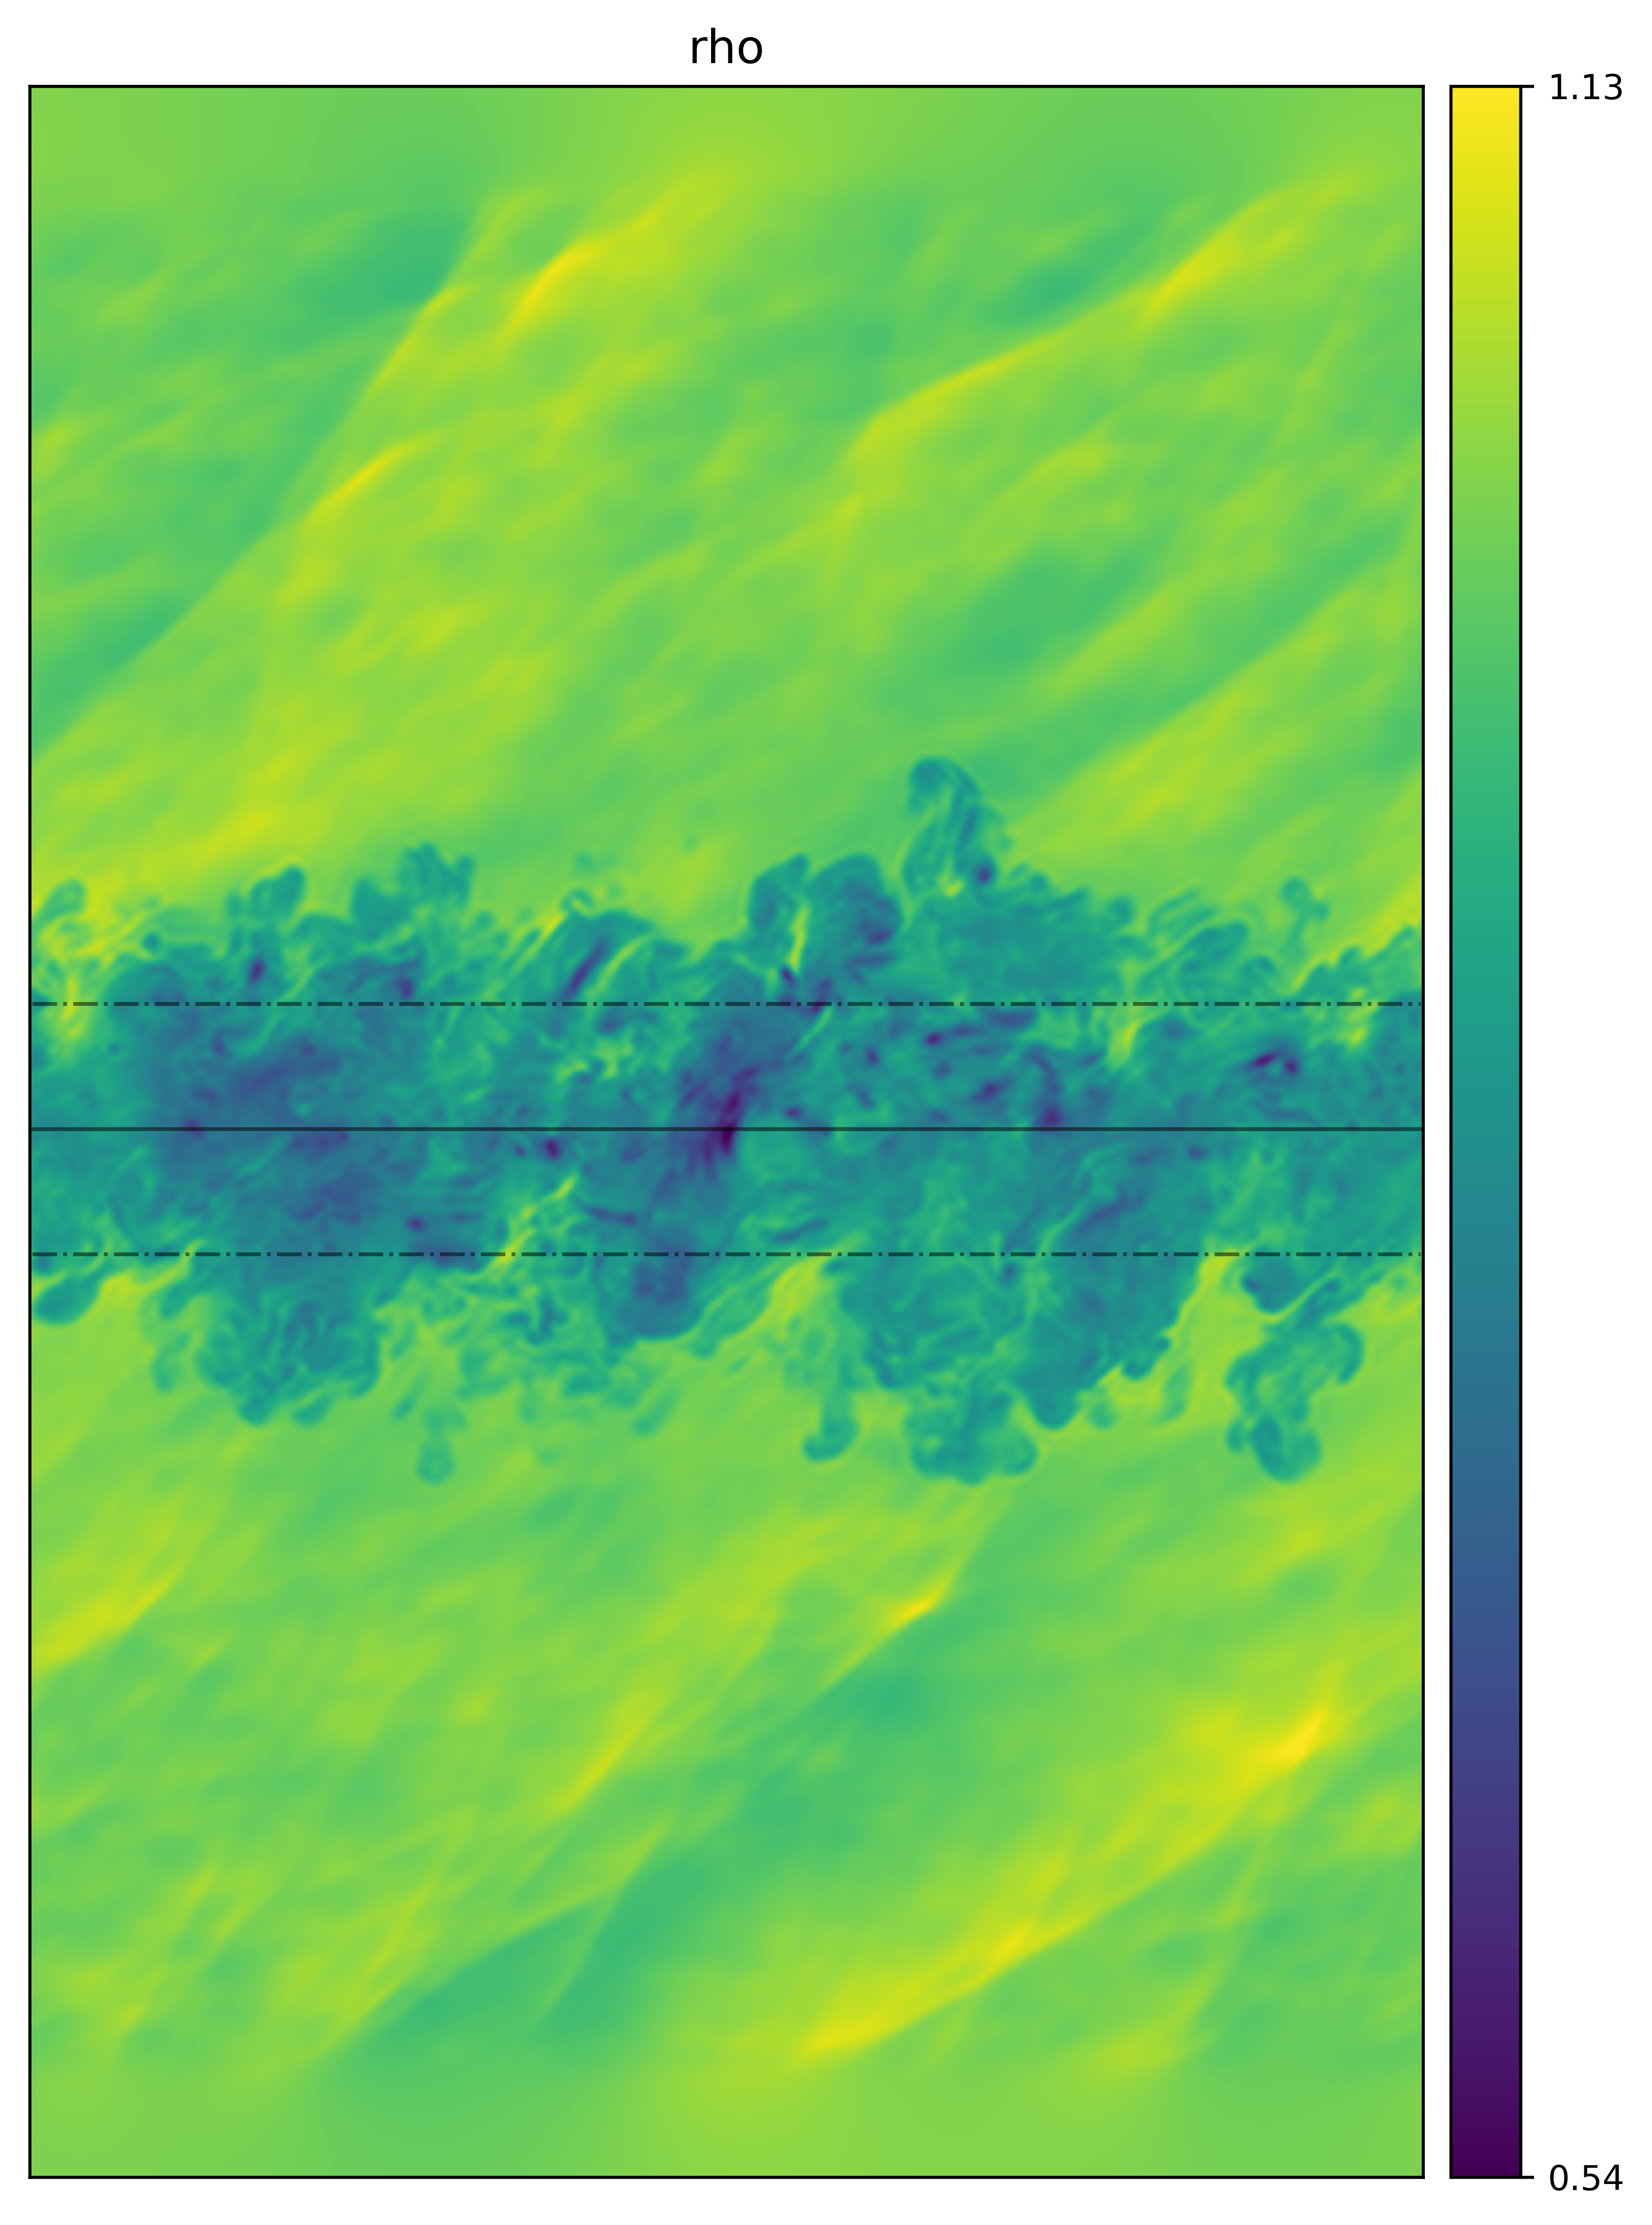

In [160]:
# plot a streamwise xy slice
zslice = Nz/2
reader.sub_domain = (0,0,zslice), (reader.domain_size[0]-1, reader.domain_size[1]-1, zslice)
step = 9
visualize_one(reader, step, qname='rho',plane='xy',cmap='viridis',dtheta=dtheta[step-1],domega=domega[step-1],savename="") 
#'inferno','afmhot','viridis'

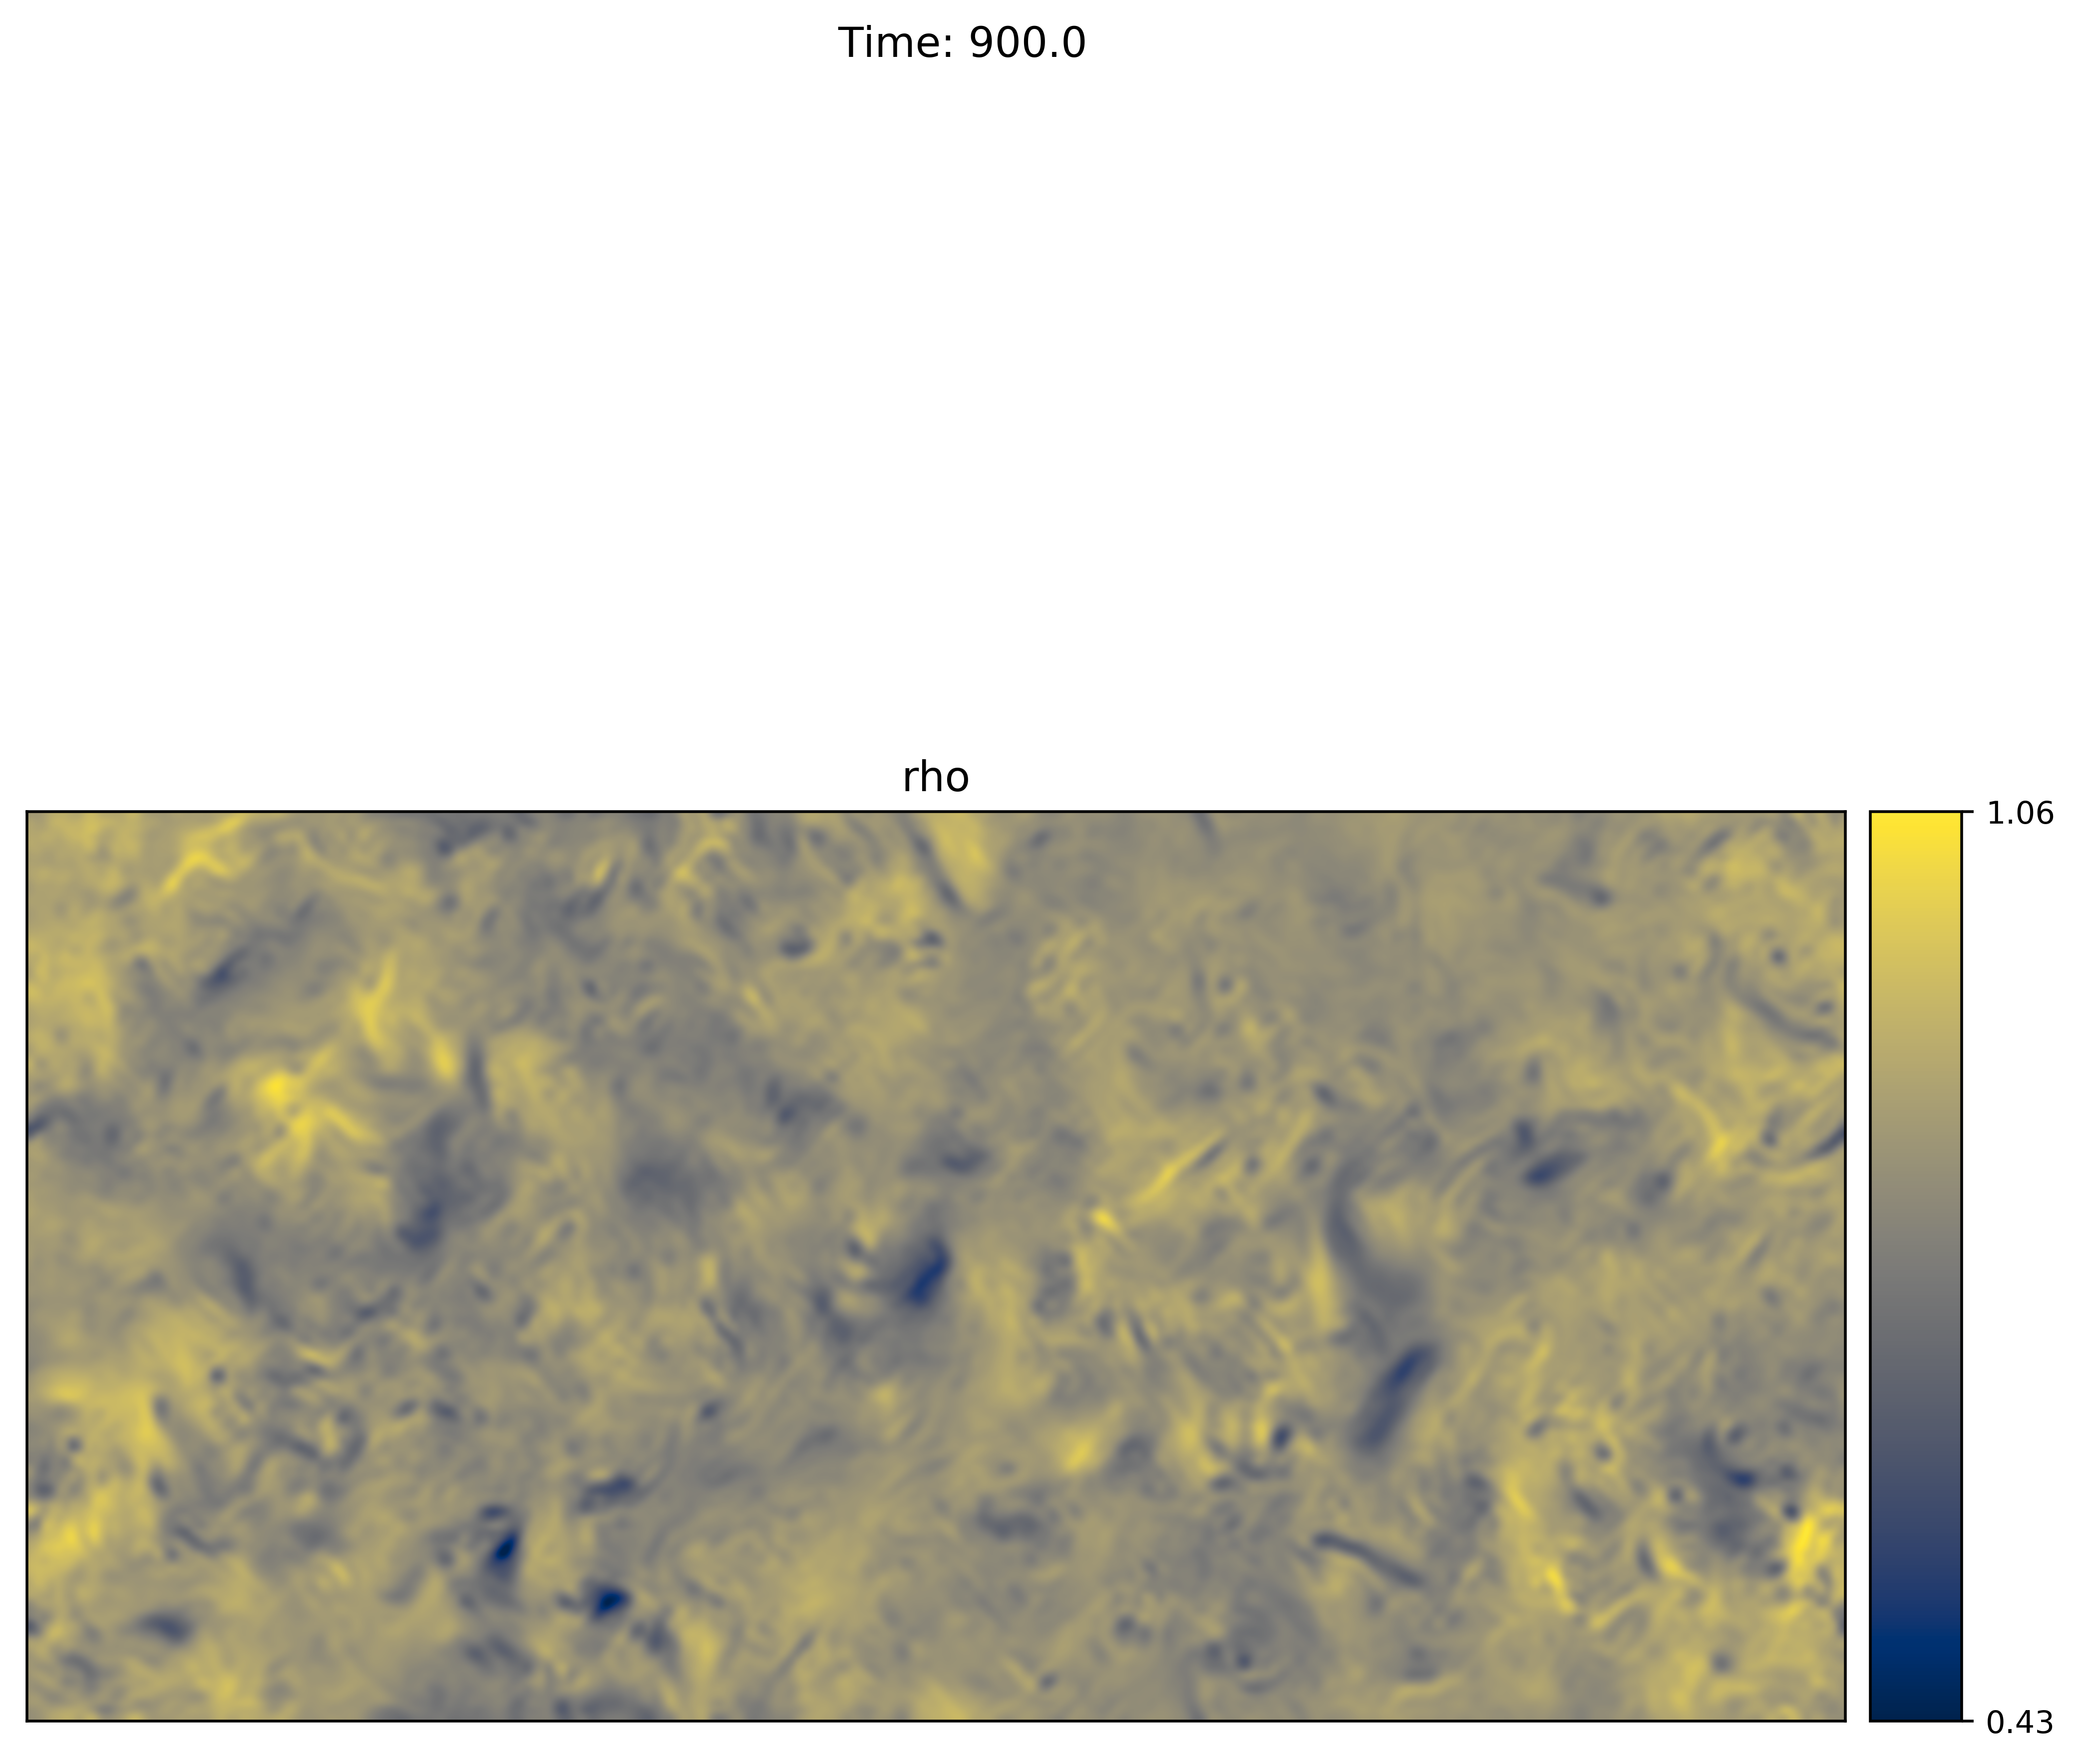

In [162]:
# plot an spanwise xz slice
yslice = Ny/2
reader.sub_domain = (0,yslice,0), (reader.domain_size[0]-1, yslice, reader.domain_size[2]-1)
step = 9
visualize_one(reader, step, qname='rho',plane='xz',cmap='cividis',savename="")

In [28]:
# plot all
for step in steps[0::]:
    savename = directory+"/img/slice_xy_%04d.png"%step
    visualize_all(reader, step=step, plane='xy',savename=savename)
    #savename = directory+"../img/slice_xz_%04d.png"%step
    #visualize_all(reader, step=step, plane='xz',savename=savename)

Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0000.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0001.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0002.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0003.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0004.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0005.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0006.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0007.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/256x362x128//img/slice_xy_0008.png
S

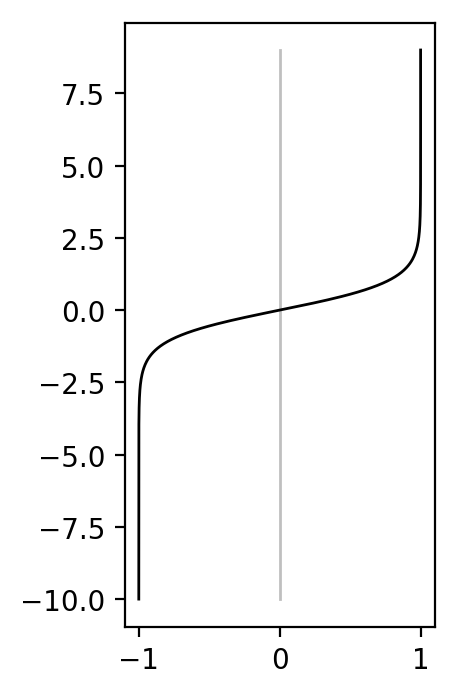

In [185]:
fig= plt.figure(figsize=(2,4), dpi=200) 
xplot = np.linspace(0,Nx-1,10)
yplot = np.linspace(-20/2,20/2-1,500)
umean = np.tanh(yplot)

rr=7.
rmean = 1.+(rr-1.)/(rr+1.)*np.tanh(yplot)
plt.plot(umean,yplot,'k-',linewidth=1)
plt.plot(np.zeros(np.shape(yplot)),yplot,'k',linewidth=1,alpha=0.25)
